In [2]:
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Model / data parameters
NUM_ROWS = 28
NUM_COLS = 28
num_classes = 10


# LOAD the MNIST data from Keras, split between train and test sets
(X_train,y_train), (X_test,y_test) = keras.datasets.mnist.load_data()

# Reshape data
X_train_plt = X_train
X_test_plt = X_test
X_train = X_train.reshape(-1, 28*28).astype('float32') / 255.
X_test = X_test.reshape(-1, 28*28).astype('float32') / 255.


# Categorically encode labels
from tensorflow.keras.utils import to_categorical
Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)

# Have first 10000 images as a validatin data and leave the rest as training
X_val = X_train[-10000:]
y_val = Y_train[-10000:]
X_train = X_train[:-10000]
Y_train = Y_train[:-10000]

print("1-shape of training data: ",X_train.shape)
print("2-shape of training labels ",Y_train.shape)
print("3-shape of validation data: ",X_val.shape)
print("4-shape of validation labels ",y_val.shape)
print("5-shape of test data : ",X_test.shape)
print("6-shape of test labels ",Y_test.shape)

11501568/11490434 [==============================] - 0s 0us/step
1-shape of training data:  (50000, 784)
2-shape of training labels  (50000, 10)
3-shape of validation data:  (10000, 784)
4-shape of validation labels  (10000, 10)
5-shape of test data :  (10000, 784)
6-shape of test labels  (10000, 10)


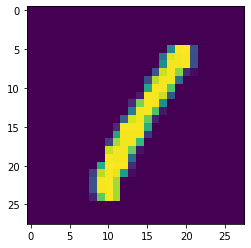

In [4]:
# Plot an image like below from the Training size
plt.imshow(X_train_plt[3])

In [5]:
#from keras.models import Sequential
#from keras.layers import Flatten, Dense, Activation
#from tensorflow.keras import layers

import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras import layers
from keras.layers.core import Activation

In [6]:
# Build the model first

model = keras.Sequential([
    keras.layers.Dense(25, input_shape=(784,)), #input layer important
])
model.add(Activation('relu'))
model.add(layers.Dense(25))
model.add(Activation('relu'))
model.add(layers.Dense(10))
model.add(Activation('softmax'))


In [7]:
# Configure the model with a categorical_crossentropy and stochastic gradient descent optimizer and observe 
# metrics as accuracy
model.compile(optimizer='SGD',
              loss='categorical_crossentropy',  
              metrics=['accuracy']) 

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 25)                19625     
                                                                 
 activation (Activation)     (None, 25)                0         
                                                                 
 dense_1 (Dense)             (None, 25)                650       
                                                                 
 activation_1 (Activation)   (None, 25)                0         
                                                                 
 dense_2 (Dense)             (None, 10)                260       
                                                                 
 activation_2 (Activation)   (None, 10)                0         
                                                                 
Total params: 20,535
Trainable params: 20,535
Non-traina

In [9]:
model.fit(X_train, Y_train,
          batch_size = 32,
          epochs=1,        
          validation_data=(X_val, y_val),
          )

1563/1563 [==============================] - 5s 3ms/step - loss: 0.9092 - accuracy: 0.7352 - val_loss: 0.4172 - val_accuracy: 0.8797


In [10]:
# Test your NN 
#Accuracy test dataset
scores = model.evaluate(X_test,Y_test)
scores 

313/313 [==============================] - 1s 2ms/step - loss: 0.4326 - accuracy: 0.8724


[0.43263915181159973, 0.8723999857902527]

In [11]:
!pip install livelossplot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 793 kB 5.8 MB/s 
     |████████████████████████████████| 381 kB 42.9 MB/s 
  Attempting uninstall: prompt-toolkit
    Found existing installation: prompt-toolkit 1.0.18
    Uninstalling prompt-toolkit-1.0.18:
      Successfully uninstalled prompt-toolkit-1.0.18
  Attempting uninstall: ipython
    Found existing installation: ipython 5.5.0
    Uninstalling ipython-5.5.0:
      Successfully uninstalled ipython-5.5.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jupyter-console 5.2.0 requires prompt-toolkit<2.0.0,>=1.0.0, but you have prompt-toolkit 3.0.29 which is incompatible.
google-colab 1.0.0 requires ipython~=5.5.0, but you have ipython 7.33.0 which is incompatible.


In [12]:
from livelossplot import PlotLossesKeras
plotlosses = PlotLossesKeras()

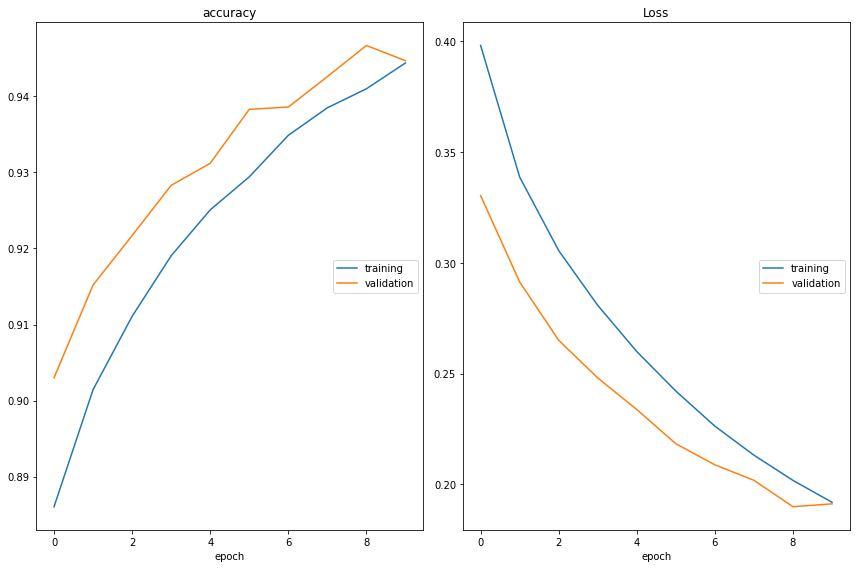

accuracy
	training         	 (min:    0.886, max:    0.944, cur:    0.944)
	validation       	 (min:    0.903, max:    0.947, cur:    0.945)
Loss
	training         	 (min:    0.192, max:    0.398, cur:    0.192)
	validation       	 (min:    0.190, max:    0.330, cur:    0.191)


In [13]:
# This time make sure you train and validate your network with epoch size of 10 and batch_size of 32 and 

# Make sure you are able to generate the similar plots  given below 

model.fit(X_train, Y_train,
          batch_size = 32,
          epochs=10,         
          validation_data=(X_val, y_val),
          callbacks=[plotlosses],
          verbose=False)

In [14]:
# Test the NN with the test data
#Accuracy test dataset
scores = model.evaluate(X_test,Y_test)
scores 

313/313 [==============================] - 1s 2ms/step - loss: 0.1869 - accuracy: 0.9451


[0.18691609799861908, 0.9451000094413757]